# Initial Exploration of dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

In [2]:
data = pd.read_csv('./world_development_indicators/Indicators.csv')

data.shape

(5656458, 6)

In [3]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### How many unique countries are there in the dataset.

In [4]:
countries = data['CountryName'].unique().tolist()

len(countries)

247

### Are there same number of country code?

In [5]:
CountryCode = data['CountryCode'].unique().tolist()

len(CountryCode)

247

### Are there many indicators or few??

In [6]:
indicator = data['IndicatorName'].unique().tolist()

len(indicator)

1344

### How many years of data we have?

In [7]:
years = data['Year'].unique().tolist()

len(years)

56

### What's the range of year?

In [8]:
print('range : ',data['Year'].min(),' to ',data['Year'].max())

range :  1960  to  2015


# Basic Matplotlib

### Let's pick a country and an indicator to explore : CO2 emmitions per capita and the USA

In [9]:
indicator_name = 'CO2 emissions \(metric'    # We need to use a '\' before ( in string

country_code = 'USA'

mask1 = data['IndicatorName'].str.contains(indicator_name)

mask2 = data['CountryCode'].str.contains(country_code)

stage = data[mask1 & mask2]

print(len(stage['Year'].unique().tolist()))

stage.head()

52


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Let's see how emission change over year using matplotlib
**barplot**

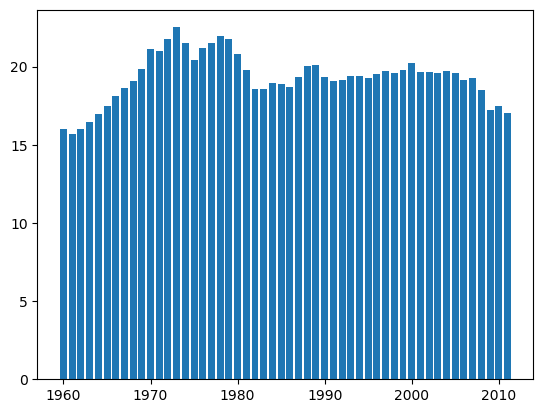

In [10]:
#get the years
years = stage['Year'].values

#get the value
CO2values = stage["Value"].values

# Create barplots
plt.bar(years,CO2values)
plt.show()

### Let's make this graphic a bit more appealing using line plot

In [11]:
# Swith to a line plot
plt.plot(years,CO2values)

# Label the axis
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#Label the figure
plt.title('CO2 emission in USA')

Text(0.5, 1.0, 'CO2 emission in USA')

To make more honest, start y axis at 0.

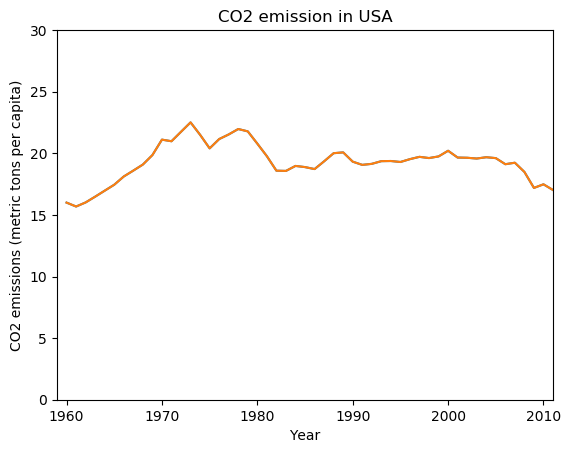

In [12]:
# Swith to a line plot
plt.plot(years,CO2values)

# Label the axis
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#Label the figure
plt.title('CO2 emission in USA')

#######
plt.axis([1959,2011,0,30])

plt.show()

### Distribution of values using histogram
visualise the range of values in CO2 production per year using histogram

In [13]:
# Get the emission value
hist_data = stage['Value'].values

len(hist_data)

52

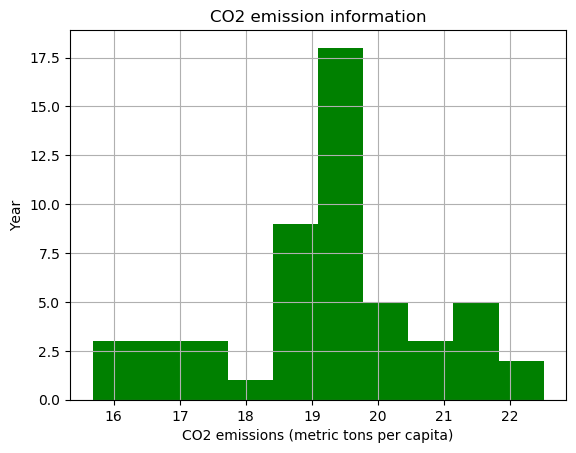

In [14]:
plt.hist(hist_data, 10, density = False, facecolor = 'green')

# Here 15 means the number of bins
# desnity = False means that does not scale the data

plt.xlabel(stage['IndicatorName'].iloc[1])
plt.ylabel('Year')
plt.title('CO2 emission information')

plt.grid(True)

plt.show()

Most years CO2 emission is in between 18.5 to 20.5

### How does the USA's number related to other countries in a perticular year?

In [15]:
indicator_name = 'CO2 emissions \(metri'

year = 2011

mask1 = data['IndicatorName'].str.contains(indicator_name)
mask2 = data['Year'].isin([year])   ## remember how to use isin([]) function

CO2_2011 = data[mask1 & mask2]

CO2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [16]:
print(len(CO2_2011))

232


In [17]:
# Which Country emmits maximum CO2 in 2011
CO2 = CO2_2011['Value'].max()
print(CO2)
CO2 = 44.0189263670224

mask3 = CO2_2011['Value'].isin([CO2])

CO2_2011[mask3]

44.0189263670224


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5161482,Qatar,QAT,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,44.018926


In [18]:
print(len(CO2_2011))

232


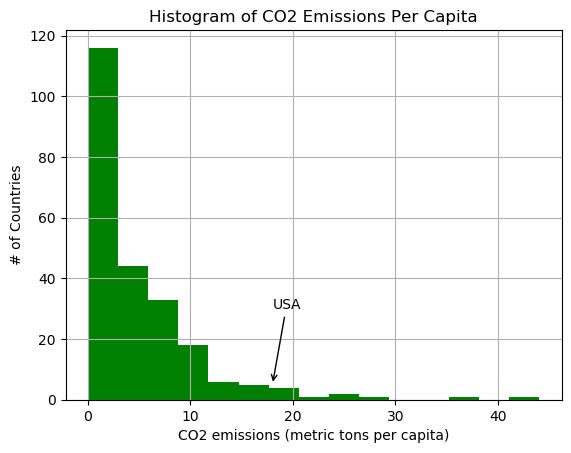

In [19]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(CO2_2011['Value'], 15, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])""
plt.grid(True)

plt.show()